## Electric Vehicle Population Data
- This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).
- Sources: [**https://catalog.data.gov/dataset/electric-vehicle-population-data**](https://catalog.data.gov/dataset/electric-vehicle-population-data)
- Variables:
    - Location (County, City, State, Postal Code)
    - Vehicle (Make, Model, EV Type, etc.)
- I find this dataset interesting because I want to observe the advancements in EV technology and the effectiveness of the trend in Washington State.

In [9]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [10]:
file_path = 'data/Electric_Vehicle_Population_Data.csv'
e_vehicle_df = pd.read_csv(file_path)

# Print data
e_vehicle_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXKT0C59G,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,15.0,206822717,POINT (-120.26317 46.40556),PACIFICORP,5.307700e+10
1,5YJ3E1EA2J,Snohomish,Edmonds,WA,98020.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,21.0,137721636,POINT (-122.37507 47.80807),PUGET SOUND ENERGY INC,5.306105e+10
2,1G1RE6E4XE,Kitsap,Port Orchard,WA,98367.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,26.0,197718468,POINT (-122.6847073 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
3,2C4RC1L76M,Skagit,Bow,WA,98232.0,2021,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,0.0,40.0,256274308,POINT (-122.440636 48.5613885),PUGET SOUND ENERGY INC,5.305795e+10
4,5YJ3E1EA2J,Thurston,Olympia,WA,98513.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,2.0,259176578,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10


In [11]:
# Cleaning dataset by dropping null values
clean_e_vehicle_df = e_vehicle_df.dropna()

In [12]:
# Verify the data after cleaning
clean_e_vehicle_df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

# Bubble Chart

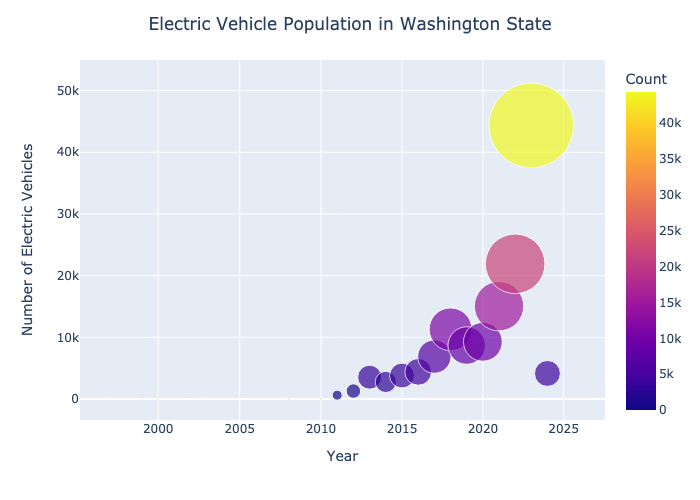

In [18]:
# Convert 'Model Year' to datetime format
e_vehicle_by_year = clean_e_vehicle_df.copy()
e_vehicle_by_year['Model Year'] = pd.to_datetime(e_vehicle_by_year['Model Year'].astype(str), format='%Y')

# Extract the year from the datetime object
e_vehicle_by_year.loc[:, 'Year'] = e_vehicle_by_year['Model Year'].dt.year

# Group the data by 'Year' and count the number of electric vehicles for each year
ev_count_by_year = e_vehicle_by_year.groupby('Year').size()

# Reset the index of the dataframe
ev_count_by_year = ev_count_by_year.reset_index(name='Count')

# Bubble chart
fig = px.scatter(ev_count_by_year, x='Year', y='Count', size='Count', color='Count', hover_name='Count', log_x=True, size_max=60)
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Electric Vehicles', title='Electric Vehicle Population in Washington State', title_x=0.5)
fig.show("png", "Electric Vehicle Population in Washington State.png")

### Analysis
The graph shows that the number of EVs in Washington State has been increasing steadily over time.
According to the dataset, there were 44,350 EVs registered in Washington State in 2023. This is a significant increase from just a few years ago, in 2010, when there were only about 1,000 EVs registered in the state. There are a number of reasons why the number of EVs in Washington State is increasing. One reason is that EVs are becoming more affordable. The cost of batteries, a major component of EVs, has been declining in recent years. Additionally, there are a number of government incentives available to people who purchase EVs, such as tax credits and rebates.

# Funnel Chart

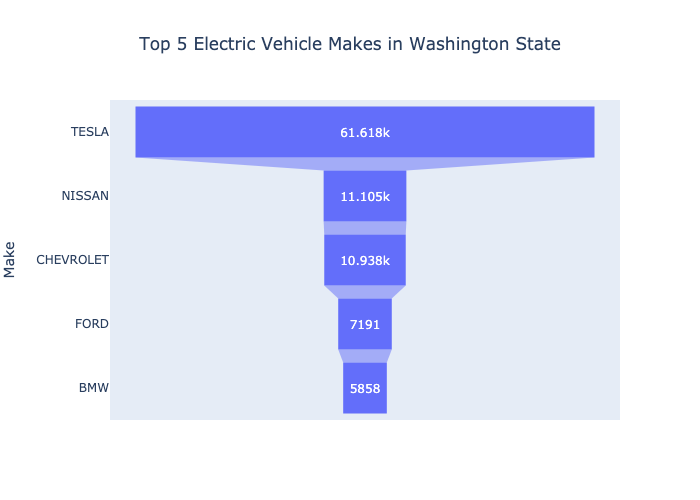

In [19]:
# Group the data by 'Make' and count the number of electric vehicles for each make
ev_count_by_make = clean_e_vehicle_df['Make'].value_counts().reset_index().head(5)
ev_count_by_make.columns = ['Make', 'Count']

fig = px.funnel(ev_count_by_make, x='Count', y='Make', title='Top 5 Electric Vehicle Makes in Washington State')
fig.update_layout(title_x=0.5)
fig.show("png", "Top 5 Electric Vehicle Makes in Washington State.png")

### Analysis

Tesla is the most popular electric vehicle maker in Washington State, with over 61,000 vehicles registered.
Nissan is the second most popular brand, with over 11,000 vehicles registered.
Chevrolet, Ford, and BMW round out the top 5, with between 5,000 and 11,000 vehicles registered each.

The popularity of electric vehicles (EVs) in Washington State, particularly the dominance of Tesla, highlights the rapid adoption of sustainable mobility solutions in the region. As of 2023, Tesla accounts for approximately 61,000 vehicles registered, far surpassing other brands. Nissan follows closely with over 11,000 vehicles registered, while Chevrolet, Ford, and BMW occupy positions three through five with similar numbers of vehicles registered.

## Candlestick Charts

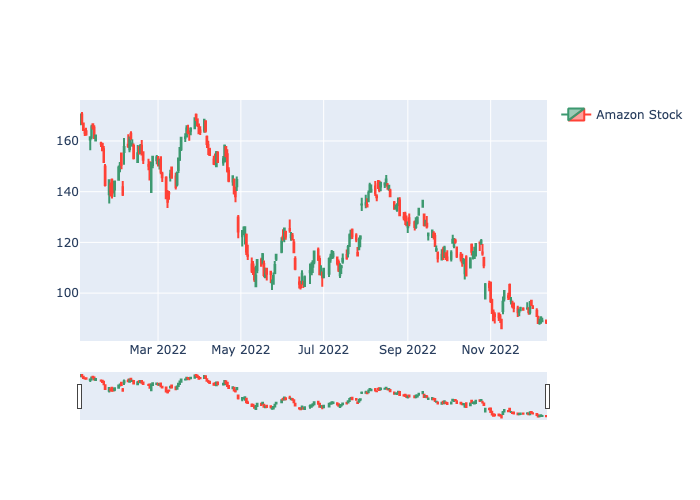

In [20]:
amazon_stock_df = pd.read_csv('data/AMZN.csv')

# Convert the 'Date' column to datetime
amazon_stock_df['Date'] = pd.to_datetime(amazon_stock_df['Date'], format='%d-%m-%Y')

# Filter the data for the year 2022
amazon_stock_df = amazon_stock_df[amazon_stock_df['Date'] >= '01-01-2022'].reset_index(drop=True)

amazon_stock_df

# Create candlestick chart
candle_stick_graph_object = go.Candlestick(
    x=amazon_stock_df['Date'],
    open=amazon_stock_df['Open'],
    high=amazon_stock_df['High'],
    low=amazon_stock_df['Low'],
    close=amazon_stock_df['Close'],
    name='Amazon Stock',
    showlegend=True,
)

# Create figure
fig = go.Figure(data=candle_stick_graph_object)
fig.show("png", "Amazon Stock.png")


### Analysis

The chart suggests that the price of Amazon stock was highly unstable during the given time period. It shows both upward and downward trends, along with periods of consolidation. The highest price was observed in March 2022, while the lowest price was seen in November 2022. The stock's performance in 2022 was influenced by various factors, including increasing interest rates, economic uncertainty, and ongoing regulatory scrutiny. Additionally, Amazon had to deal with challenges related to slowing revenue growth and heavy investments in several sectors such as fulfillment, delivery, AWS, and AI technology.